In [2]:
!pip install rasterio


You should consider upgrading via the 'C:\Users\akmin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\akmin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# import numpy as np
# import cv2
# import tensorflow as tf
# import rasterio
# # import matplotlib.pyplot as plt

# # ✅ Define the Dice Coefficient Function
# def dice_coef(y_true, y_pred, smooth=1):
#     y_true_f = tf.keras.backend.flatten(y_true)
#     y_pred_f = tf.keras.backend.flatten(y_pred)
#     intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
#     return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

# def load_and_preprocess_image(s1_path, s2_path, elevation_path, slope_path):
#     """Loads and preprocesses the input images for flood prediction."""
#     def read_tiff(file_path):
#         with rasterio.open(file_path) as src:
#             img = src.read(1)  # Read first band
#         return img

#     # Load each channel
#     s1 = read_tiff(s1_path)
#     s2 = read_tiff(s2_path)
#     elevation = read_tiff(elevation_path)
#     slope = read_tiff(slope_path)

#     # Resize to match model input size (128x128)
#     s1 = cv2.resize(s1, (128, 128))
#     s2 = cv2.resize(s2, (128, 128))
#     elevation = cv2.resize(elevation, (128, 128))
#     slope = cv2.resize(slope, (128, 128))

#     # Normalize images (assuming range 0-255)
#     s1, s2, elevation, slope = s1 / 255.0, s2 / 255.0, elevation / 255.0, slope / 255.0

#     # Stack channels together
#     img = np.stack([s1, s2, elevation, slope], axis=-1)  # Shape: (128, 128, 4)
#     img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 128, 128, 4)

#     return img, s1, s2, elevation, slope  # Return raw images for visualization

# def predict_flood(s1_path, s2_path, elevation_path, slope_path, model_path="unet_flood_model.h5"):
#     """Predicts flood areas given the input images."""
#     # ✅ Load the model with custom objects
#     model = tf.keras.models.load_model(model_path, custom_objects={'dice_coef': dice_coef})

#     # Preprocess input image
#     img, s1, s2, elevation, slope = load_and_preprocess_image(s1_path, s2_path, elevation_path, slope_path)

#     # Predict flood mask
#     pred_mask = model.predict(img)[0, :, :, 0]
#     binary_mask = (pred_mask > 0.5).astype(np.uint8)  # Convert to binary (0 or 1)

#     return binary_mask, s1, s2, elevation, slope

# # ✅ File Paths
# s1_image = "sample/sentinel12_s1_59_img.tif"
# s2_image = "sample/sentinel12_s2_59_img.tif"
# elevation_image = "sample/sentinel12_copdem30_59_elevation.tif"
# slope_image = "sample/sentinel12_copdem30_59_slope.tif"

# # ✅ Predict flood mask
# predicted_flood_mask, s1_vis, s2_vis, elevation_vis, slope_vis = predict_flood(s1_image, s2_image, elevation_image, slope_image)

# # ✅ Display Input Images and Predicted Flood Mask
# fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# axes[0].imshow(s1_vis, cmap="gray")
# axes[0].set_title("Sentinel-1 (SAR)")
# axes[0].axis("off")

# axes[1].imshow(s2_vis, cmap="gray")
# axes[1].set_title("Sentinel-2 (Optical)")
# axes[1].axis("off")

# axes[2].imshow(elevation_vis, cmap="terrain")
# axes[2].set_title("Elevation")
# axes[2].axis("off")

# axes[3].imshow(slope_vis, cmap="gray")
# axes[3].set_title("Slope")
# axes[3].axis("off")

# axes[4].imshow(predicted_flood_mask, cmap="gray")
# axes[4].set_title("Predicted Flood Mask")
# axes[4].axis("off")

# plt.tight_layout()
# plt.show()


ModuleNotFoundError: No module named 'cv2'

In [3]:
!pip uninstall opencv-python-headless -y
!pip install opencv-python-headless

  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\akmin\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\akmin\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


1/1 [==============================] - 1s 1s/step


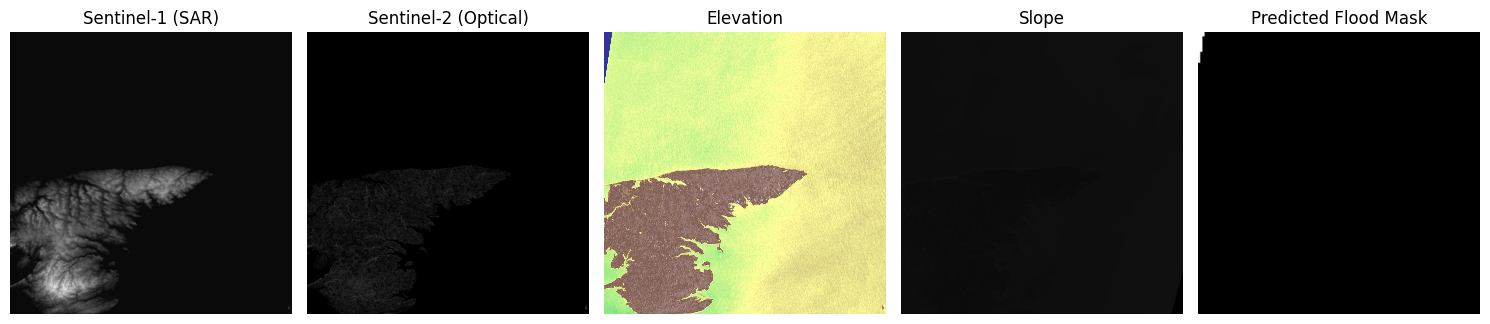

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import rasterio
import matplotlib.pyplot as plt

# ✅ Define the Dice Coefficient Function
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

def normalize(image):
    """Normalize image between 0 and 1 using the exact same formula."""
    return (image - np.min(image)) / (np.max(image) - np.min(image)) if np.max(image) != np.min(image) else np.zeros_like(image)

def load_and_preprocess_image(s1_path, s2_path, elevation_path, slope_path):
    """Loads and preprocesses the input images for flood prediction."""
    def read_tiff(file_path):
        with rasterio.open(file_path) as src:
            img = src.read(1)  # Read first band
        return img

    # ✅ Load images using the exact method you used
    s1 = read_tiff(s1_path)
    s2 = read_tiff(s2_path)
    elevation = read_tiff(elevation_path)
    slope = read_tiff(slope_path)

    # ✅ First, normalize using your method before resizing
    s1 = normalize(s1)
    s2 = normalize(s2)
    elevation = normalize(elevation)
    slope = normalize(slope)

    # ✅ Store raw images for visualization before resizing
    raw_s1, raw_s2, raw_elevation, raw_slope = s1.copy(), s2.copy(), elevation.copy(), slope.copy()

    # ✅ Resize to match model input size (128x128)
    s1 = cv2.resize(s1, (128, 128))
    s2 = cv2.resize(s2, (128, 128))
    elevation = cv2.resize(elevation, (128, 128))
    slope = cv2.resize(slope, (128, 128))

    # ✅ Stack channels together as per your method
    img = np.stack([s1, s2, elevation, slope], axis=-1)  # Shape: (128, 128, 4)
    img = np.expand_dims(img, axis=0)  # Add batch dimension (1, 128, 128, 4)

    return img, raw_s1, raw_s2, raw_elevation, raw_slope  # Return raw images for visualization

def predict_flood(s1_path, s2_path, elevation_path, slope_path, model_path="final_model.h5"):
    """Predicts flood areas given the input images."""
    # ✅ Load the model with custom objects
    model = tf.keras.models.load_model(model_path, custom_objects={'dice_coef': dice_coef})

    # ✅ Preprocess input image using your method
    img, raw_s1, raw_s2, raw_elevation, raw_slope = load_and_preprocess_image(s1_path, s2_path, elevation_path, slope_path)

    # ✅ Predict flood mask
    pred_mask = model.predict(img)[0, :, :, 0]
    binary_mask = (pred_mask > 0.5).astype(np.uint8)  # Convert to binary (0 or 1)

    return binary_mask, raw_s1, raw_s2, raw_elevation, raw_slope

# ✅ File Paths
s1_image = "sample/sentinel12_s1_59_img.tif"
s2_image = "sample/sentinel12_s2_59_img.tif"
elevation_image = "sample/sentinel12_copdem30_59_elevation.tif"
slope_image = "sample/sentinel12_copdem30_59_slope.tif"

# ✅ Predict flood mask
predicted_flood_mask, raw_s1_vis, raw_s2_vis, raw_elevation_vis, raw_slope_vis = predict_flood(s1_image, s2_image, elevation_image, slope_image)

# ✅ Display Raw Input Images (Before Resizing) and Predicted Flood Mask
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

axes[0].imshow(raw_s1_vis, cmap="gray")
axes[0].set_title("Sentinel-1 (SAR)")
axes[0].axis("off")

axes[1].imshow(raw_s2_vis, cmap="gray")
axes[1].set_title("Sentinel-2 (Optical)")
axes[1].axis("off")

axes[2].imshow(raw_elevation_vis, cmap="terrain")
axes[2].set_title("Elevation")
axes[2].axis("off")

axes[3].imshow(raw_slope_vis, cmap="gray")
axes[3].set_title("Slope")
axes[3].axis("off")

axes[4].imshow(predicted_flood_mask, cmap="gray")
axes[4].set_title("Predicted Flood Mask")
axes[4].axis("off")

plt.tight_layout()
plt.show()


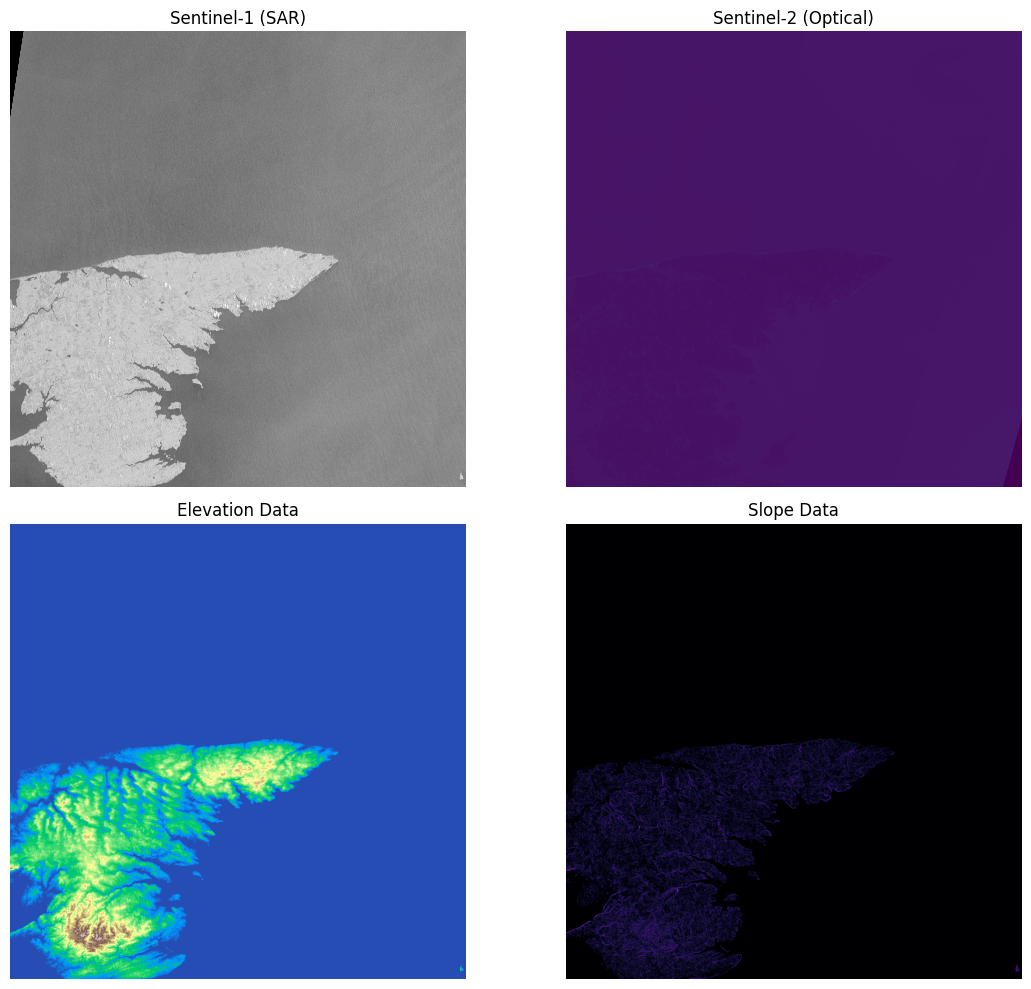

In [20]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def read_tiff(file_path):
    """Read a single-band TIFF file and return the image array."""
    with rasterio.open(file_path) as src:
        img = src.read(1)  # Read the first band
    return img

# ✅ Define file paths (Update these paths if needed)
s1_image_path = "sample/sentinel12_s1_59_img.tif"
s2_image_path = "sample/sentinel12_s2_59_img.tif"
elevation_path = "sample/sentinel12_copdem30_59_elevation.tif"
slope_path = "sample/sentinel12_copdem30_59_slope.tif"

# ✅ Load Images
s1_image = read_tiff(s1_image_path)
s2_image = read_tiff(s2_image_path)
elevation_image = read_tiff(elevation_path)
slope_image = read_tiff(slope_path)

# ✅ Plot the Images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Sentinel-1 (SAR)
axes[0, 0].imshow(s1_image, cmap="gray")
axes[0, 0].set_title("Sentinel-1 (SAR)")
axes[0, 0].axis("off")

# Sentinel-2 (Optical)
axes[0, 1].imshow(s2_image, cmap="viridis")  # 'viridis' for better contrast
axes[0, 1].set_title("Sentinel-2 (Optical)")
axes[0, 1].axis("off")

# Elevation
axes[1, 0].imshow(elevation_image, cmap="terrain")
axes[1, 0].set_title("Elevation Data")
axes[1, 0].axis("off")

# Slope
axes[1, 1].imshow(slope_image, cmap="magma")
axes[1, 1].set_title("Slope Data")
axes[1, 1].axis("off")

plt.tight_layout()
plt.show()


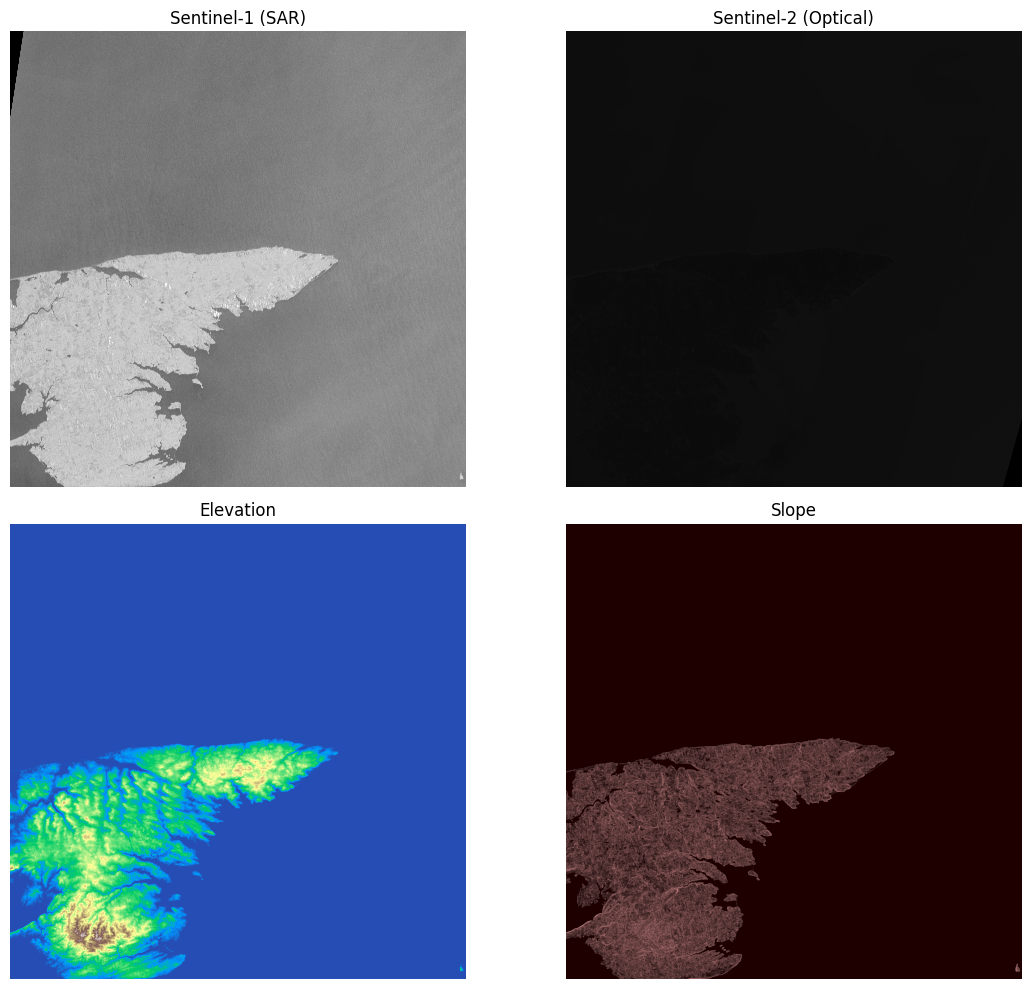

In [21]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define file paths
s1_path = "sample/sentinel12_s1_59_img.tif"
s2_path = "sample/sentinel12_s2_59_img.tif"
elevation_path = "sample/sentinel12_copdem30_59_elevation.tif"
slope_path = "sample/sentinel12_copdem30_59_slope.tif"

# Function to read and normalize images
def load_and_normalize_image(path):
    with rasterio.open(path) as src:
        image = src.read(1).astype(np.float32)  # Read first band
        image = (image - np.min(image)) / (np.max(image) - np.min(image))  # Normalize to 0-1
    return image

# Load images
s1_image = load_and_normalize_image(s1_path)
s2_image = load_and_normalize_image(s2_path)
elevation = load_and_normalize_image(elevation_path)
slope = load_and_normalize_image(slope_path)

# Plot the images
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(s1_image, cmap="gray")
axes[0, 0].set_title("Sentinel-1 (SAR)")

axes[0, 1].imshow(s2_image, cmap="gray")  # If Sentinel-2 is multi-band, adjust accordingly
axes[0, 1].set_title("Sentinel-2 (Optical)")

axes[1, 0].imshow(elevation, cmap="terrain")
axes[1, 0].set_title("Elevation")

axes[1, 1].imshow(slope, cmap="pink")
axes[1, 1].set_title("Slope")

# Remove axes
for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()


In [24]:
import rasterio

s2_path = "sample/sentinel12_s2_59_img.tif"

with rasterio.open(s2_path) as src:
    print(f"Sentinel-2 Image Bands: {src.count}")  # Check how many bands
    print(f"Data Type: {src.dtypes[0]}")  # Check data type
    print(f"Min-Max Values: {src.read(1).min()} to {src.read(1).max()}")  # Min-max range


Sentinel-2 Image Bands: 6
Data Type: uint16
Min-Max Values: 0 to 18045


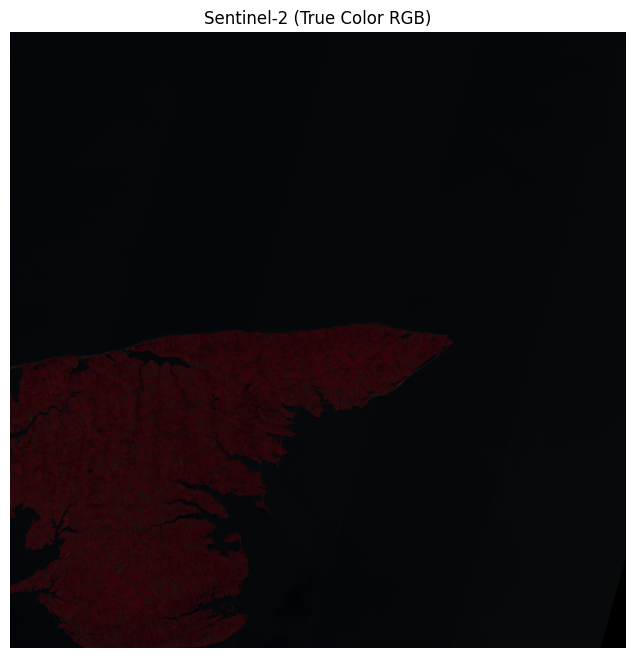

In [25]:
def load_rgb_image(path, bands=(4, 3, 2)):  # Sentinel-2 True Color Bands
    with rasterio.open(path) as src:
        rgb = np.stack([src.read(b) for b in bands], axis=-1).astype(np.float32)
        rgb = (rgb - np.min(rgb)) / (np.max(rgb) - np.min(rgb))  # Normalize
    return rgb

# Load RGB Sentinel-2
s2_rgb = load_rgb_image(s2_path)

# Plot RGB Sentinel-2
plt.figure(figsize=(8, 8))
plt.imshow(s2_rgb)
plt.title("Sentinel-2 (True Color RGB)")
plt.axis("off")
plt.show()
